#ANALISIS DE VENTA PARA ALURA STORE

CLIENTE: Sr.Juan


### Importación de datos



In [8]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda1 = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

#columnas de tiendas

tienda1['tienda'] = "tienda 1"
tienda2['tienda'] = "tienda 2"
tienda3['tienda'] = "tienda 3"
tienda4['tienda'] = "tienda 4"


#uno todas las tiendas

df = pd.concat([tienda1, tienda2, tienda3, tienda4])




#1. Análisis de facturación



Primero, agrupamos los datos por tienda en una tabla para sumar la facturación de cada una. Al hacerlo, podemos obtener el total de ventas de cada tienda y compararlas entre sí. De esta manera, podemos identificar cuál tienda tuvo la mayor facturación, lo que nos permite conocer cuál de ellas vendió más. Este proceso es útil para analizar el rendimiento de cada tienda y tomar decisiones basadas en esos datos.


In [11]:
ingresos_totales = df.groupby('tienda')['Precio'].sum()
ingresos_totales

,Precio
tienda,
tienda 1,1.150880e+09
tienda 2,1.116344e+09
tienda 3,1.098020e+09
tienda 4,1.038376e+09


Se realiza un formateo de los ingresos para mostrar los valores completos en lugar de la notación científica, como 1.150880e+09. Así, los ingresos se presentan con separadores de miles y el símbolo de peso, como $1,150,880,400, lo que indica que la cifra está expresada en pesos colombianos.


In [20]:
print("🔎 Ingreso total por tienda en pesos colombianos \n")
for tienda, ingreso in ingresos_totales_format.items():
    print(f"{tienda}: {ingreso}")

🔎 Ingreso total por tienda en pesos colombianos 

tienda 1: $1,150,880,400
tienda 2: $1,116,343,500
tienda 3: $1,098,019,600
tienda 4: $1,038,375,700


Creamos un gráfico con la biblioteca Matplotlib, donde pyplot actúa como nuestro “pincel” para dibujar barras, líneas o tortas, y ticker nos permite personalizar las etiquetas de los ejes X y Y (p. ej. mostrar los valores en formato moneda con separadores de miles). De este modo, visualizamos de forma clara el resultado del análisis total de facturación.

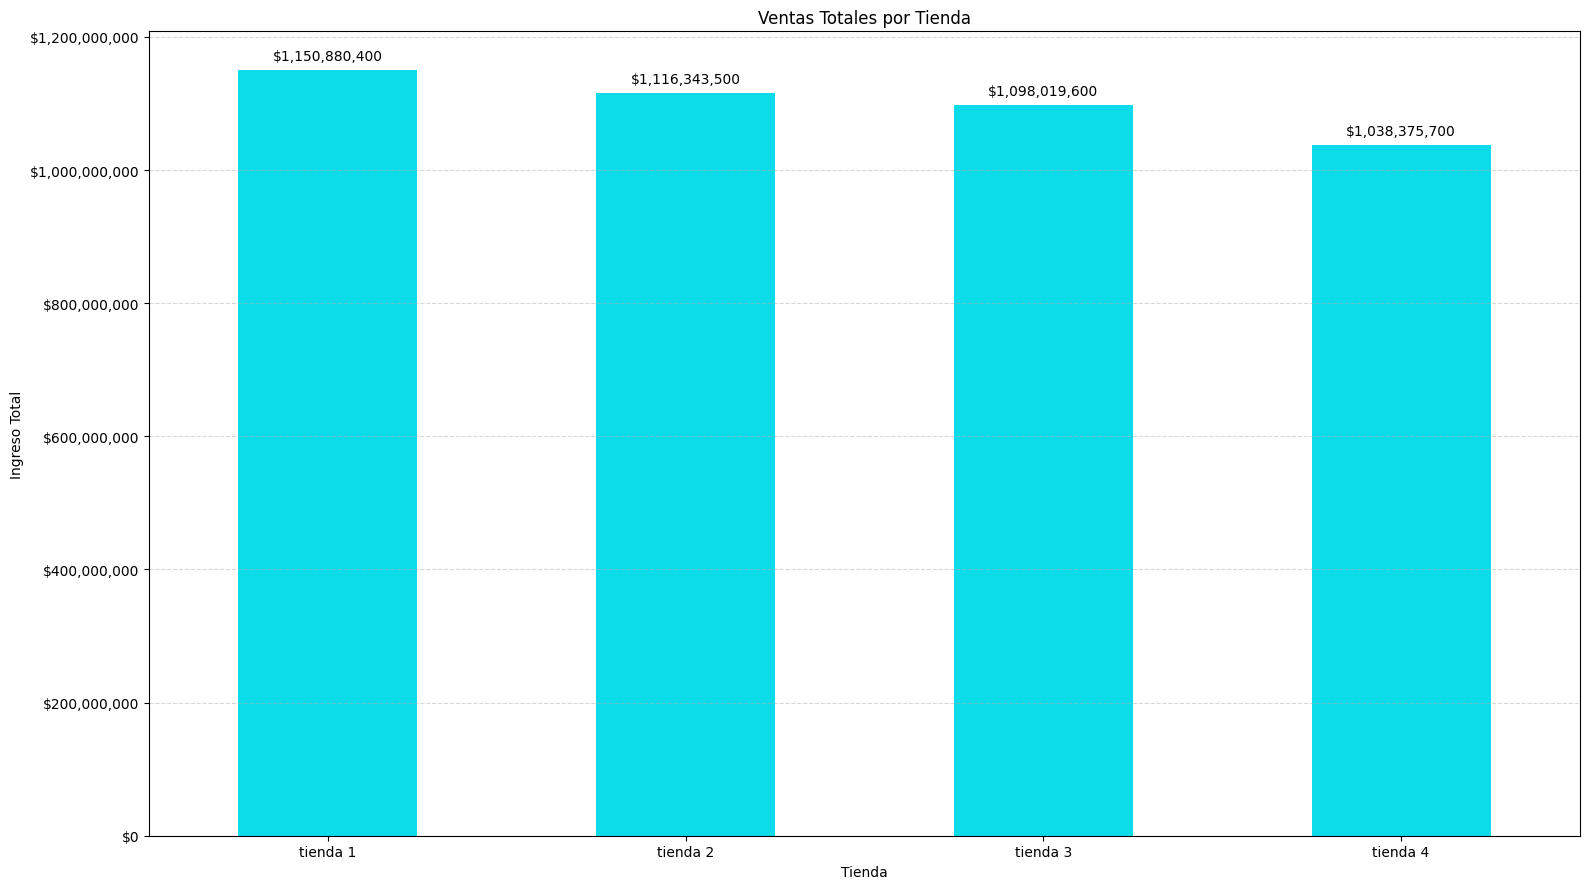

In [38]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

# 1) Creo la figura con ancho=8 y alto=5 (tupla)
plt.figure(figsize=(16, 9))

# 2) Dibujo las barras con los ingresos totales
ingresos_totales.plot(kind="bar", color="#0cdbea" )

# 3) Título y etiquetas de ejes
plt.title("Ventas Totales por Tienda")
plt.xlabel("Tienda")
plt.ylabel("Ingreso Total")

# 4) Mostrar valores sobre las barras
for i, v in enumerate(ingresos_totales):
    plt.text(x=i, y=v + 1e7, s=f"${v:,.0f}", ha='center', va='bottom', fontsize=10, color='black' )

# 5) Ajustes de  y
plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f"${x:,.0f}"))

# 6) Ajusta de stilos
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()

# 7) Muestra el gráfico
plt.show()





#  ventas en tiendas


### Análisis de ventas por tienda

La **tienda 1** es la que más vende, seguida por la **tienda 2**. Aunque la **tienda 3** no supera a las dos anteriores, también muestra buenos ingresos al compararse con la tienda 2. En cambio, la **tienda 4** se queda muy por debajo en ventas, ya que no alcanza los $1.050.000.000 COP como sí lo hacen las otras tres tiendas.

**Ranking de tiendas por ventas:**
1. Tienda 1  
2. Tienda 2  
3. Tienda 3  
4. Tienda 4

# 2. Ventas por categoría

1. Para empezar, organizamos los registros del DataFrame agrupándolos según la columna “Categoría del Producto” y calculamos la suma de los precios dentro de cada grupo. De este modo obtenemos un listado con cada categoría acompañada de su total acumulado de ingresos, lo que nos permite conocer de un vistazo qué segmentos generan más facturación.

In [24]:
#agrupamos las categoria y vemos sus ingresos
ventas_categoria = df.groupby('Categoría del Producto')['Precio'].sum()
ventas_categoria


,Precio
Categoría del Producto,
Artículos para el hogar,5.757980e+07
Deportes y diversión,1.429777e+08
Electrodomésticos,1.324751e+09
Electrónicos,1.660576e+09
Instrumentos musicales,3.487726e+08
Juguetes,7.360440e+07
Libros,3.769610e+07
Muebles,7.576610e+08


2. A continuación, tomamos esos totales brutos y les aplicamos un formateo monetario, incorporando el símbolo de peso y separadores de miles. Con ello convertimos valores como 1324751100 en cadenas legibles como $1,324,751,100, facilitando la interpretación de los montos al presentar cifras de gran magnitud.

In [31]:
#formateamos

ventas_categoria_format = ventas_categoria.apply(lambda x: f"${x:,.0f}")

# imprimimos

print("🔎 Ingreso total por categoría de producto en pesos colombianos\n")
for categoria, ingreso in ventas_categoria_format.items():
  print(f"{categoria}: {ingreso}")

🔎 Ingreso total por categoría de producto en pesos colombianos

Artículos para el hogar: $57,579,800
Deportes y diversión: $142,977,700
Electrodomésticos: $1,324,751,100
Electrónicos: $1,660,576,500
Instrumentos musicales: $348,772,600
Juguetes: $73,604,400
Libros: $37,696,100
Muebles: $757,661,000


3. Por último, transformamos la serie con los ingresos formateados en un DataFrame de pandas. Al disponer la información en una tabla, cada fila corresponde a una categoría y su respectivo ingreso formateado, lo que mejora enormemente la legibilidad y nos permite explorar, filtrar o exportar los resultados de manera cómoda y estructurada.

In [32]:
import pandas as pd

# Crear un DataFrame con los ingresos por categoría formateados
ventas_categoria_df = pd.DataFrame(ventas_categoria_format)

# Imprimir la tabla
print("🔎 Ingreso total por categoría de producto en pesos colombianos\n")
ventas_categoria_df


🔎 Ingreso total por categoría de producto en pesos colombianos



,Precio
Categoría del Producto,
Artículos para el hogar,"$57,579,800"
Deportes y diversión,"$142,977,700"
Electrodomésticos,"$1,324,751,100"
Electrónicos,"$1,660,576,500"
Instrumentos musicales,"$348,772,600"
Juguetes,"$73,604,400"
Libros,"$37,696,100"
Muebles,"$757,661,000"


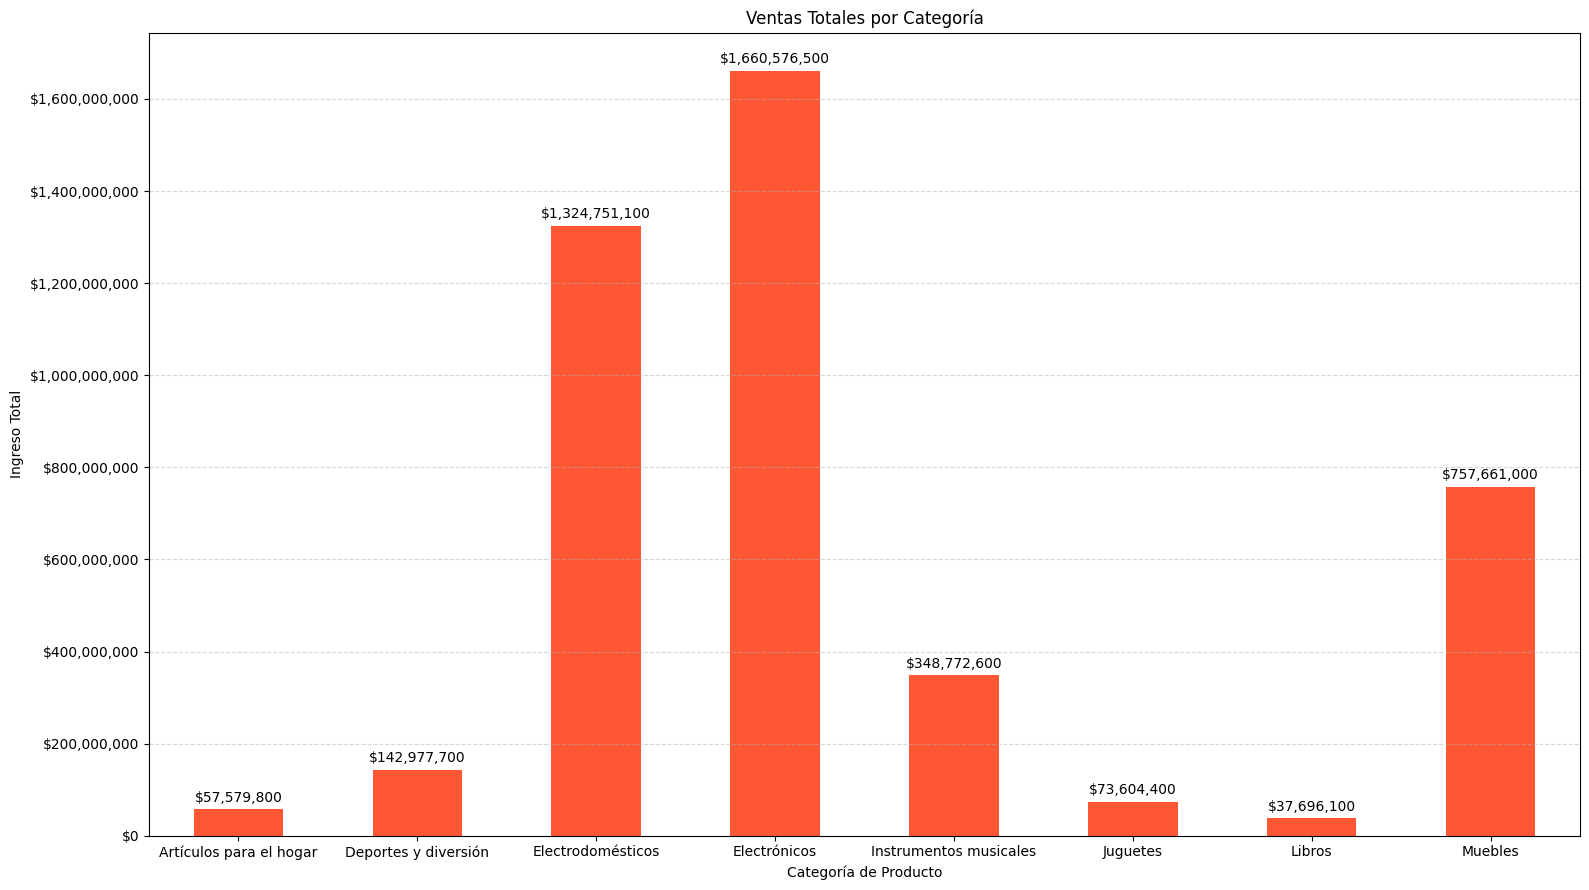

In [37]:
# 2. Crear el gráfico de barras
plt.figure(figsize=(16, 9))
ventas_categoria.plot(kind="bar", color="#FF5733")

# 3. Título y etiquetas de los ejes
plt.title("Ventas Totales por Categoría")
plt.xlabel("Categoría de Producto")
plt.ylabel("Ingreso Total")

# 4. Mostrar los valores sobre las barras
for i, v in enumerate(ventas_categoria):
    plt.text(i, v + 1e7, f"${v:,.0f}", ha='center', va='bottom', fontsize=10)

# 5) Ajustes de  y
plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f"${x:,.0f}"))

# 6) Ajusta de stilos
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()

# 7) Muestra el gráfico
plt.show()

### Análisis de Ventas por Categoría

En este análisis, hemos agrupado las ventas por categoría de producto y calculado el ingreso total de cada una de ellas. A continuación, se presentan los resultados más destacados:

#### Categorías más vendidas:
La categoría que lidera las ventas es **Electrónicos**, con un total de **$1,660,576,500** en ventas. Esta categoría se destaca notablemente por encima de las demás, con un margen considerable sobre las siguientes en el ranking.

La **segunda categoría más vendida** es **Electrodomésticos**, con un ingreso total de **$1,324,751,100**. Si bien está detrás de Electrónicos, sigue siendo una categoría con un fuerte volumen de ventas.

En **tercer lugar** se encuentra **Muebles**, que alcanzó un total de **$757,661,000** en ventas. Esta categoría también ha mostrado un buen desempeño, aunque con un margen inferior al de Electrónicos y Electrodomésticos.



Categorías que superan los $500M en ventas:
De las ocho categorías analizadas, solo Electrónicos, Electrodomésticos y Muebles han logrado superar los $500 millones en ventas. Estas tres categorías representan las más exitosas en términos de facturación.


Ranking de Categorías:

A continuación, se presenta el ranking completo de las categorías, ordenadas de mayor a menor ingreso:

1.Electrónicos: $1,660,576,500

2.Electrodomésticos: $1,324,751,100

3.Muebles: $757,661,000

4.Instrumentos musicales: $348,772,600

5.Deportes y diversión: $142,977,700

6.Juguetes: $73,604,400

7.Artículos para el hogar: $57,579,800

8.Libros: $37,696,100


Conclusión:

El gráfico generado muestra visualmente las diferencias en las ventas entre las diferentes categorías. Al observar el ranking, podemos destacar que las categorías más vendidas tienen ingresos significativos, mientras que las categorías como Libros y Artículos para el hogar muestran un desempeño más bajo. Es interesante notar que las categorías de Electrónicos y Electrodomésticos dominan el mercado, lo que podría indicar una preferencia por productos tecnológicos y funcionales dentro de la oferta de productos.

Este análisis también podría ser útil para realizar estrategias de marketing y promoción, focalizando esfuerzos en las categorías de mayor venta, mientras se buscan alternativas para impulsar el desempeño de las categorías con menores ventas.


# 3. Calificación promedio de la tienda


In [44]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda1 = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

# Añadir una columna para identificar de qué tienda proviene cada DataFrame
tienda1['Tienda'] = 'Tienda 1'
tienda2['Tienda'] = 'Tienda 2'
tienda3['Tienda'] = 'Tienda 3'
tienda4['Tienda'] = 'Tienda 4'

# Concatenar todos los DataFrames de las tiendas en uno solo
todos = pd.concat([tienda1, tienda2, tienda3, tienda4])

# 2. Calcular la calificación promedio por tienda
calificaciones_promedio_tienda1 = tienda1['Calificación'].mean()
calificaciones_promedio_tienda2 = tienda2['Calificación'].mean()
calificaciones_promedio_tienda3 = tienda3['Calificación'].mean()
calificaciones_promedio_tienda4 = tienda4['Calificación'].mean()

# 3. Mostrar las calificaciones promedio por tienda
print("🔎 Calificación promedio por tienda:\n")
print(f"Tienda 1: {calificaciones_promedio_tienda1:.1f} ⭐")
print(f"Tienda 2: {calificaciones_promedio_tienda2:.1f} ⭐")
print(f"Tienda 3: {calificaciones_promedio_tienda3:.1f} ⭐")
print(f"Tienda 4: {calificaciones_promedio_tienda4:.1f} ⭐")

# Contar cuántas veces aparece cada calificación en cada tienda
distribucion = todos.groupby('Tienda')['Calificación'] \
                   .value_counts() \
                   .unstack(fill_value=0)

# Mostrar la distribución de las calificaciones por tienda
print("\nDistribución de calificaciones por tienda:")
distribucion









🔎 Calificación promedio por tienda:

Tienda 1: 4.0 ⭐
Tienda 2: 4.0 ⭐
Tienda 3: 4.0 ⭐
Tienda 4: 4.0 ⭐

Distribución de calificaciones por tienda:


Calificación,1,2,3,4,5
Tienda,,,,,
Tienda 1,319,86,218,444,1292
Tienda 2,273,93,209,482,1302
Tienda 3,297,79,193,434,1356
Tienda 4,310,85,210,453,1300


Resumen del Análisis de Calificaciones Promedio por Tienda
En este análisis, se calcularon las calificaciones promedio de los clientes para cuatro tiendas diferentes. Los resultados muestran que la calificación promedio en todas las tiendas es de 4.0 estrellas.

Detalles Clave:
Calificación Promedio:

Todas las tiendas tienen una calificación promedio de 4.0 ⭐, lo que indica que, en general, los clientes están satisfechos con los productos y servicios ofrecidos.

Distribución de Calificaciones:

En la distribución de las calificaciones, se observa que la mayoría de las calificaciones son de 4 o 5 estrellas. Esto sugiere que las tiendas están recibiendo una respuesta positiva generalizada por parte de los clientes.

Posibles Explicaciones:

La alta concentración de calificaciones positivas podría indicar un alto nivel de satisfacción del cliente.

Es posible que los clientes más satisfechos tiendan a dejar calificaciones, lo que eleva la media.

La homogeneidad en las calificaciones podría reflejar una oferta consistente en productos de buena calidad y un servicio eficiente en todas las tiendas.

Conclusión:
La calificación promedio de 4.0 ⭐ es totalmente justificable si la mayoría de los clientes califican de manera positiva (4 o 5 estrellas). Sin embargo, es importante seguir monitorizando la distribución de las calificaciones, ya que una calificación promedio tan alta podría esconder una posible falta de calificaciones más bajas, lo que podría sugerir un sesgo en el proceso de calificación.

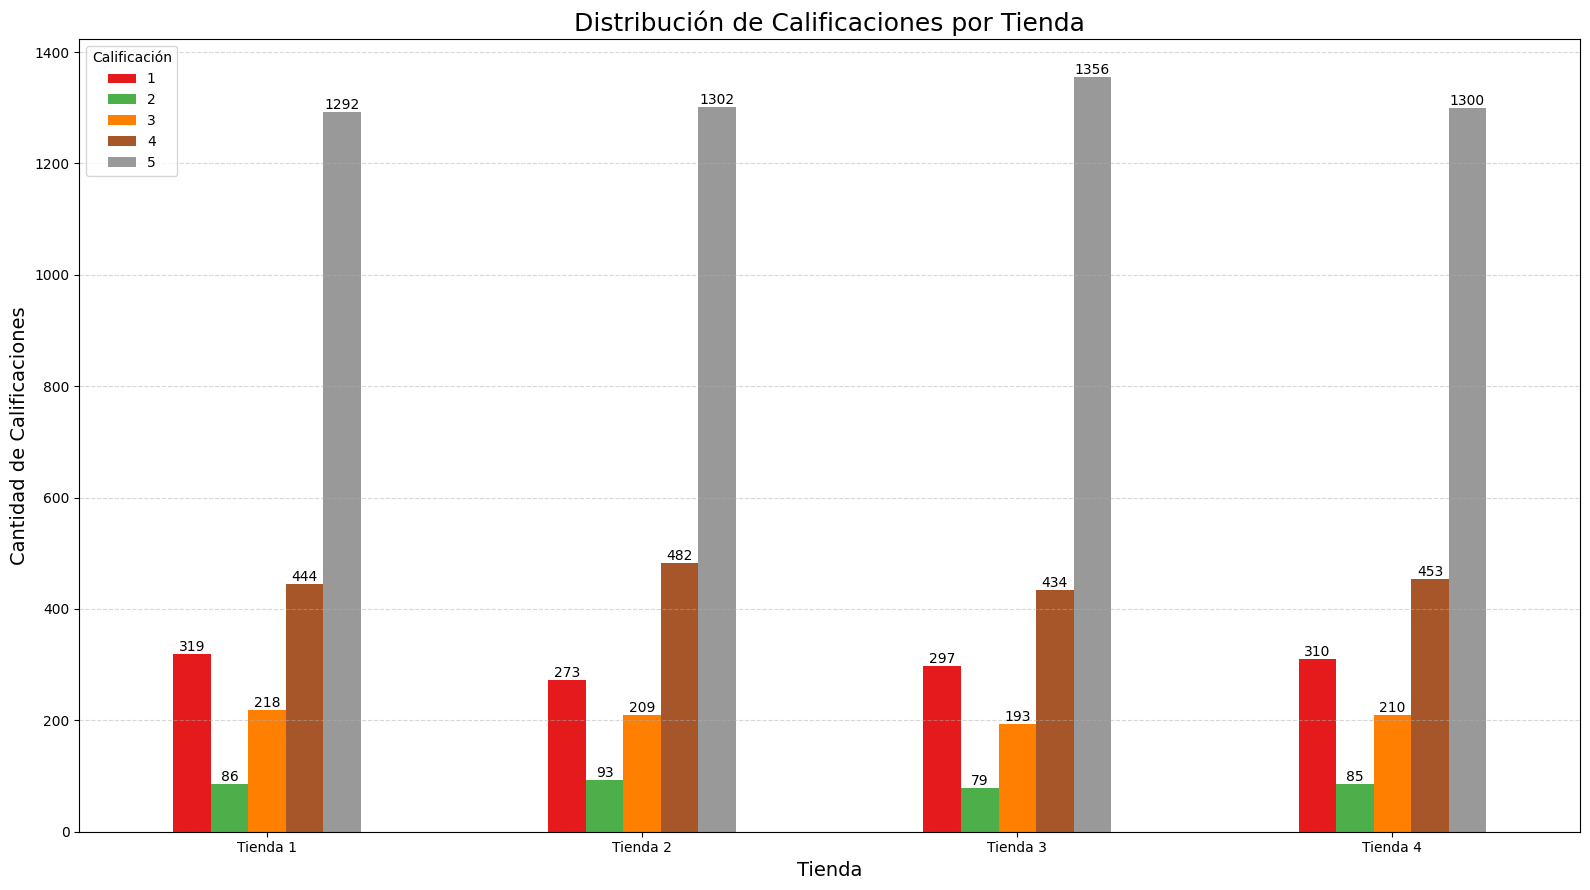

In [47]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

# Crear el gráfico directamente desde el DataFrame
ax = distribucion.plot(kind='bar', figsize=(16, 9), colormap='Set1')

# Título y etiquetas de los ejes
plt.title("Distribución de Calificaciones por Tienda", fontsize=18)
plt.xlabel("Tienda", fontsize=14)
plt.ylabel("Cantidad de Calificaciones", fontsize=14)

# Mostrar los valores sobre las barras
for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=10)

# Ajustes de estilo
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()

# Mostrar el gráfico
plt.show()



TODAS LAS TIENDAS TIENEN UN PROMEDIO DE 4.0 EN CALIFICACION PERO PODEMOS LLEGAR A LAS SIGUIENTES CONCLUSIONES


✅ Tienda con menos calificaciones de 1 estrella: Tienda 2 (273)

✅ Tienda con más calificaciones de 5 estrellas: Tienda 3 (1356)

✅Tienda con mayor cantidad de calificaciones altas (4 y 5):
Tienda 3, con 1790 calificaciones — lo que sugiere que es la mejor valorada en general.

Esto indica que Tienda 3 no solo tiene más 5 estrellas, sino también el mayor número total de calificaciones positivas, lo que la convierte en la tienda con mejor percepción general por parte de los clientes.


✅ Tienda con más calificaciones negativas (1 y 2):
Tienda 1, con 405 calificaciones baja

Tienda 1 es la peor valorada por los usuarios, ya que tiene la mayor cantidad de calificaciones de 1 y 2 estrellas. Aunque también tiene muchas de 5 estrellas, esta alta cantidad de opiniones negativas puede indicar problemas de calidad o servicio inconsistentes.


# 4. Productos más y menos vendidos

Esto  da un total de las ventas por producto, sin diferenciar entre las tiendas, solo el total combinado. asi podemos ver cual es el producto mas rentable en general y cual es el menos vendido

In [52]:
import pandas as pd

# Leemos los archivos CSV
url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda1 = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

# Añadir una columna para identificar de qué tienda proviene cada DataFrame
tienda1['Tienda'] = 'Tienda 1'
tienda2['Tienda'] = 'Tienda 2'
tienda3['Tienda'] = 'Tienda 3'
tienda4['Tienda'] = 'Tienda 4'

# Concatenar todos los DataFrames de las tiendas en uno solo
todos = pd.concat([tienda1, tienda2, tienda3, tienda4])

# 1. Contar las ventas de cada producto en todas las tiendas
productos_vendidos = todos.groupby('Producto').size()

# 2. Ordenar los productos por cantidad de ventas (de mayor a menor)
productos_ordenados = productos_vendidos.sort_values(ascending=False)

# Mostrar la cantidad de ventas de cada producto
print("Cantidad de ventas de cada producto:")
productos_ordenados




Cantidad de ventas de cada producto:


,0
Producto,
Mesa de noche,210
Microondas,206
Carrito de control remoto,206
Batería,203
Cama king,201
Modelado predictivo,200
Secadora de ropa,200
Set de ollas,200
Cama box,199


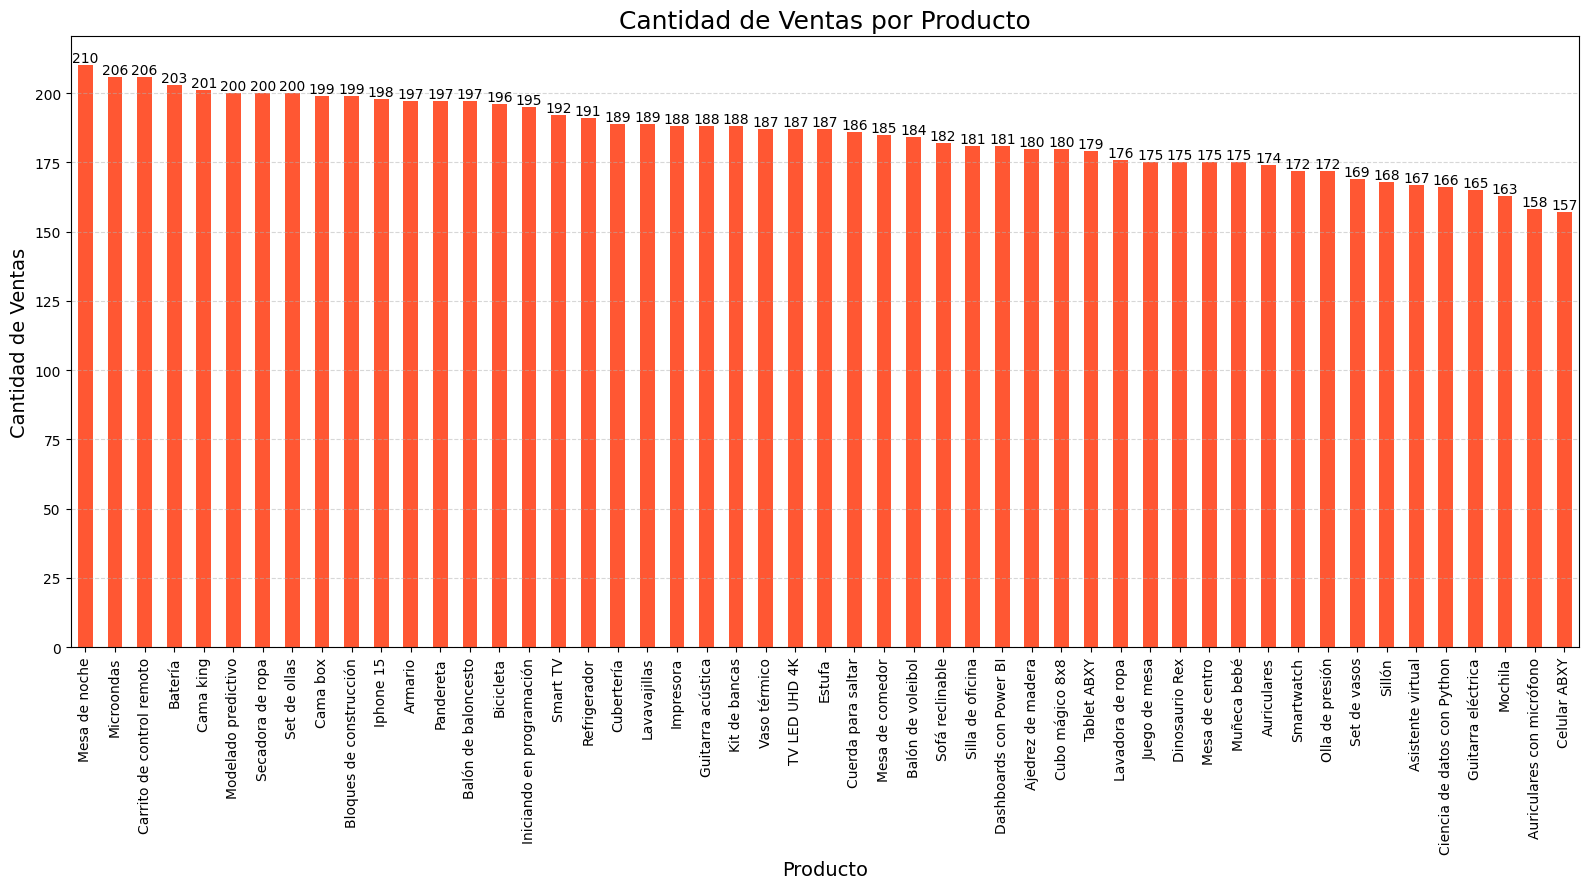

In [54]:
import matplotlib.pyplot as plt

# Crear el gráfico de barras
plt.figure(figsize=(16, 9))
ax = productos_ordenados.plot(kind='bar', color='#FF5733')

# Título y etiquetas de los ejes
plt.title("Cantidad de Ventas por Producto", fontsize=18)
plt.xlabel("Producto", fontsize=14)
plt.ylabel("Cantidad de Ventas", fontsize=14)

# Mostrar los valores sobre las barras
for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=10)

# Ajustes de estilo
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()

# Mostrar el gráfico
plt.show()

ESTE GRAFICO NOS DA UN VISTASO GENERAL DE TODAS LAS VENTAS COMBINADAS DE CADA PRODUCTO ENTRE LAS 4 TIENDAS ASI PODEMOS VER QUE EL PRODUCTO MAS VENDIDO ES

LA MESA DE NOCHE CON 210 VENTAS

Y EL MENOS VENDIDO ES

CELULAR abxy con 157 ventas

engeneral todos los productos se mantienen arriba de las 150 ventas

y solo 8 productos llegan a 200 o mas ventas

#producto mas y menos vendido por cada tienda

In [64]:
import pandas as pd

# URLs de los CSV
url1 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

# Cargar y etiquetar cada tienda
tiendas = {
    "Tienda 1": pd.read_csv(url1),
    "Tienda 2": pd.read_csv(url2),
    "Tienda 3": pd.read_csv(url3),
    "Tienda 4": pd.read_csv(url4)
}

# Mostrar el producto más y menos vendido por tienda (basado en frecuencia)
print("Productos más y menos vendidos por tienda (cantidad de veces que se vendieron):\n")

for nombre, df in tiendas.items():
    conteo = df["Producto"].value_counts()
    mas_vendido = conteo.idxmax()
    menos_vendido = conteo.idxmin()
    print(f"{nombre}:")
    print(f"  Producto más vendido: {mas_vendido} con {conteo.max()} ventas")
    print(f"  Producto menos vendido: {menos_vendido} con {conteo.min()} ventas\n")






Productos más y menos vendidos por tienda (cantidad de veces que se vendieron):

Tienda 1:
  Producto más vendido: Microondas con 60 ventas
  Producto menos vendido: Auriculares con micrófono con 33 ventas

Tienda 2:
  Producto más vendido: Iniciando en programación con 65 ventas
  Producto menos vendido: Juego de mesa con 32 ventas

Tienda 3:
  Producto más vendido: Kit de bancas con 57 ventas
  Producto menos vendido: Bloques de construcción con 35 ventas

Tienda 4:
  Producto más vendido: Cama box con 62 ventas
  Producto menos vendido: Guitarra eléctrica con 33 ventas



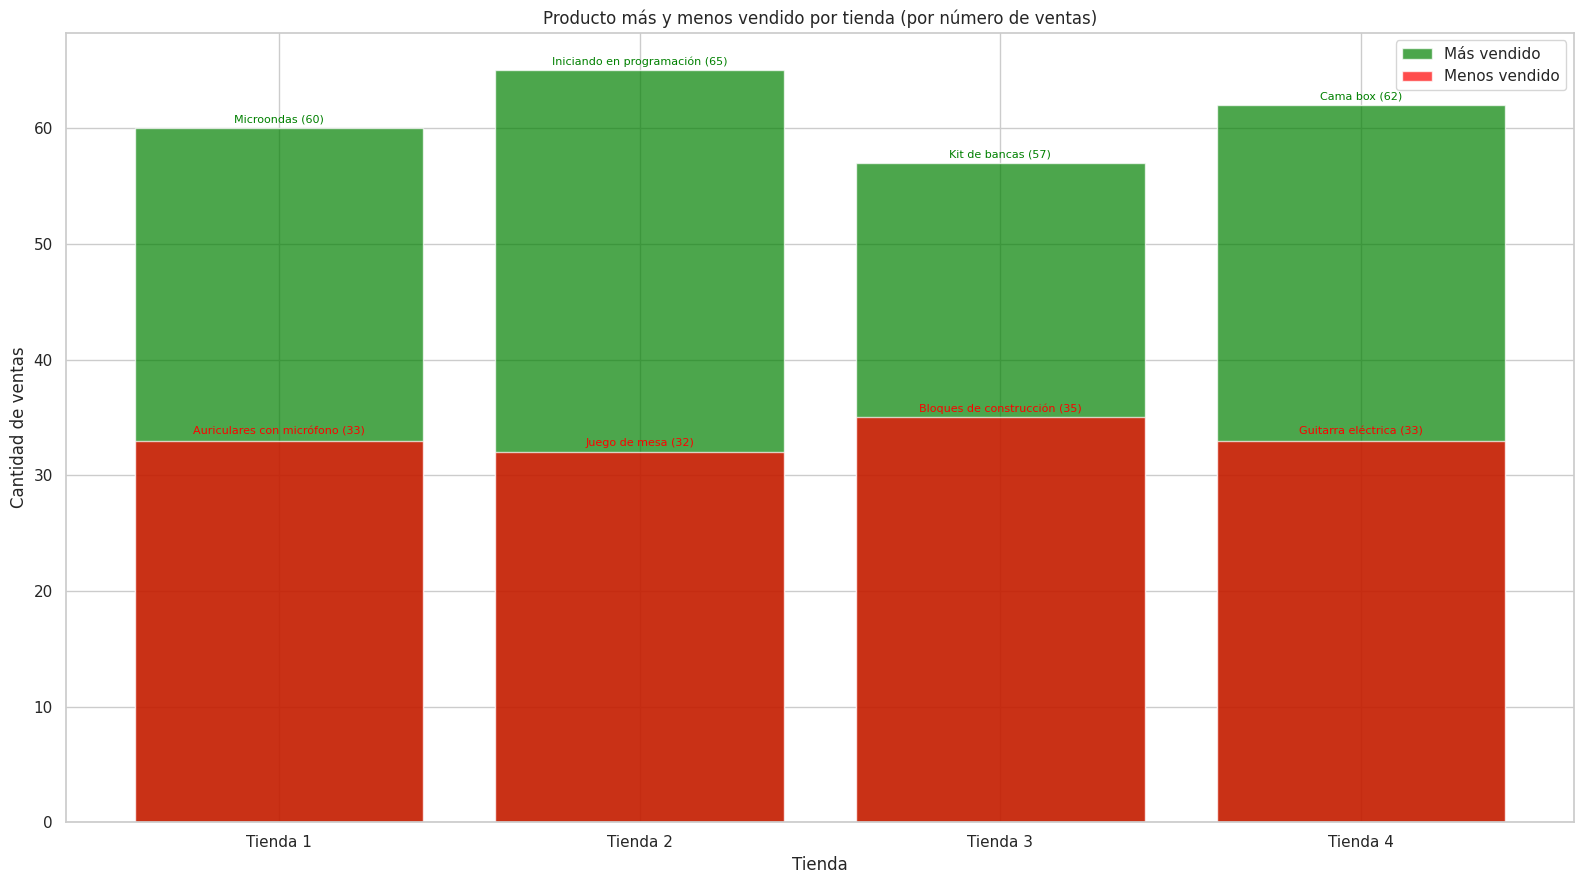

In [63]:
import pandas as pd
import matplotlib.pyplot as plt

# URLs de los CSV
url1 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

# Cargar y etiquetar cada tienda
tiendas = {
    "Tienda 1": pd.read_csv(url1),
    "Tienda 2": pd.read_csv(url2),
    "Tienda 3": pd.read_csv(url3),
    "Tienda 4": pd.read_csv(url4)
}

# Listas para los datos del gráfico
tiendas_lista = []
productos_max = []
ventas_max = []
productos_min = []
ventas_min = []

# Obtener los productos más y menos vendidos por tienda
for nombre, df in tiendas.items():
    ventas = df["Producto"].value_counts()
    producto_max = ventas.idxmax()
    producto_min = ventas.idxmin()

    tiendas_lista.append(nombre)
    productos_max.append(f"{producto_max} ({ventas.max()})")
    ventas_max.append(ventas.max())
    productos_min.append(f"{producto_min} ({ventas.min()})")
    ventas_min.append(ventas.min())

# Crear gráfico
x = range(len(tiendas_lista))
plt.figure(figsize=(16, 9))

plt.bar(x, ventas_max, color='green', alpha=0.7, label='Más vendido')
plt.bar(x, ventas_min, color='red', alpha=0.7, label='Menos vendido')

# Añadir etiquetas
plt.xticks(x, tiendas_lista)
plt.title("Producto más y menos vendido por tienda (por número de ventas)")
plt.xlabel("Tienda")
plt.ylabel("Cantidad de ventas")
plt.legend()

# Mostrar los nombres de productos encima de las barras
for i in x:
    plt.text(i, ventas_max[i]+0.5, productos_max[i], ha='center', fontsize=8, color='green')
    plt.text(i, ventas_min[i]+0.5, productos_min[i], ha='center', fontsize=8, color='red')

plt.tight_layout()
plt.show()




A partir del análisis de los datos de ventas por tienda, observamos que cada sucursal presenta una tendencia distinta en cuanto a los productos más y menos populares. En la Tienda 1, el Microondas fue el artículo más solicitado, mientras que los Auriculares con micrófono tuvieron la menor demanda. Por su parte, en la Tienda 2, el libro “Iniciando en programación” lideró las ventas, siendo el Juego de mesa el menos adquirido. La Tienda 3 destacó por la alta venta de Kits de bancas, en contraste con los Bloques de construcción, que registraron la menor cantidad de compras. Finalmente, en la Tienda 4, la Cama box fue el producto más vendido, mientras que la Guitarra eléctrica tuvo la menor rotación. Este análisis sugiere que la preferencia de los clientes varía considerablemente entre tiendas, posiblemente influenciada por el tipo de público, ubicación o estrategias de marketing locales.

# 5. Envío promedio por tienda

ahora calularemos cual es el costo de envio promedio por tienda

In [67]:
import pandas as pd

# URLs de los CSV
url1 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

# Cargar y etiquetar cada tienda
tiendas = {
    "Tienda 1": pd.read_csv(url1),
    "Tienda 2": pd.read_csv(url2),
    "Tienda 3": pd.read_csv(url3),
    "Tienda 4": pd.read_csv(url4)
}

# Calcular costo de envío promedio por tienda
print("Costo de envío promedio por tienda:\n")
costos_envio = {}

for nombre, df in tiendas.items():
    promedio_envio = df["Costo de envío"].mean()
    costos_envio[nombre] = promedio_envio
    print(f"{nombre}: ${promedio_envio:.2f}")

# Encontrar la tienda con el mayor gasto promedio en envío
tienda_mas_cara = max(costos_envio, key=costos_envio.get)
print(f"\nLa tienda con el mayor costo de envío promedio es {tienda_mas_cara} con: ${costos_envio[tienda_mas_cara]:.2f}")
print("La tienda con el menor costo de envio promedio es la tienda 4 con : $23459.46")


Costo de envío promedio por tienda:

Tienda 1: $26018.61
Tienda 2: $25216.24
Tienda 3: $24805.68
Tienda 4: $23459.46

La tienda con el mayor costo de envío promedio es Tienda 1 con: $26018.61
La tienda con el menor costo de envio promedio es la tienda 4 con : $23459.46


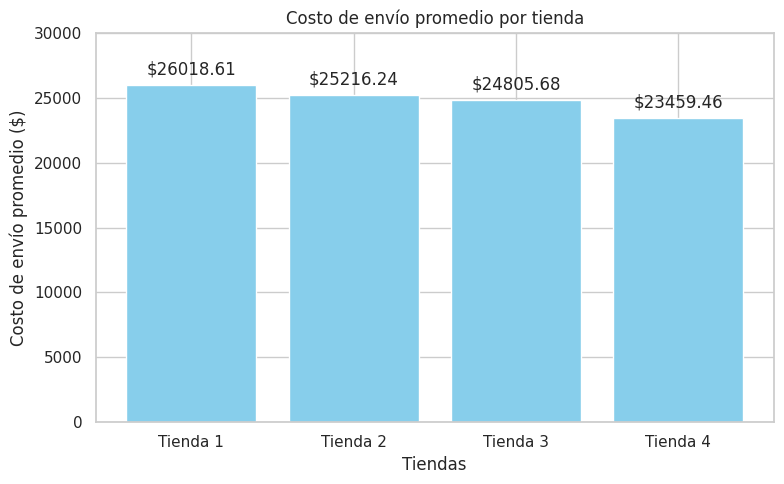

In [69]:
import matplotlib.pyplot as plt

#  gráfico
nombres_tiendas = list(costos_envio.keys())
valores_envio = list(costos_envio.values())

plt.figure(figsize=(8, 5))
plt.bar(nombres_tiendas, valores_envio, color='skyblue')
plt.title("Costo de envío promedio por tienda")
plt.xlabel("Tiendas")
plt.ylabel("Costo de envío promedio ($)")
plt.ylim(0, 30000)

# Agregar etiquetas encima de cada barra
for i, valor in enumerate(valores_envio):
    plt.text(i, valor + 500, f"${valor:.2f}", ha='center', va='bottom')

plt.tight_layout()
plt.show()



como se logra apreciar en el grafico la tienda con un precio de envio promeido mas alto es la tienda 1 y le sigue la 2.

la 4 seria la que tiene un promedio de envio mas barato o mas bajo

# 6. Informe final y conclusion

#Informe Final: Análisis de Datos de Ventas y Costos de Envío de Alura Store

##Cliente: Sr. Juan

##Análisis de Facturación por Tienda

En cuanto a la facturación total de las tiendas, los resultados muestran las siguientes conclusiones:

-Tienda con mayor facturación:

-Tienda 1 con una facturación total de $1,150,880,400.

-Tienda con menor facturación:

-Tienda 4 con una facturación total de $1,038,375,700.

Ranking de facturación por tienda:

1) Tienda 1: $1,150,880,400

2) Tienda 2: $1,116,343,500

3) Tienda 3: $1,098,019,600

4) Tienda 4: $1,038,375,700

En general, podemos observar que Tienda 1 lidera en facturación, mientras que Tienda 4 es la que menos ingresos genera, aunque sigue siendo una tienda importante en términos de ventas.



## Análisis de Ventas por Categoría de Producto

Al analizar las ventas agrupadas por categoría de producto, los resultados más destacados son los siguientes:

Categorías más vendidas:

-Electrónicos: $1,660,576,500 en ventas.

-Electrodomésticos: $1,324,751,100 en ventas.

-Muebles: $757,661,000 en ventas.

-Categorías que superan los 500 millones en ventas:

Electrónicos, Electrodomésticos, y Muebles son las tres categorías más exitosas en términos de facturación, con Electrónicos liderando el ranking.

Ranking de Categorías:

1) Electrónicos: $1,660,576,500

2) Electrodomésticos: $1,324,751,100

3) Muebles: $757,661,000

4) Instrumentos musicales: $348,772,600

5) Deportes y diversión: $142,977,700

6) Juguetes: $73,604,400

7) Artículos para el hogar: $57,579,800

8) Libros: $37,696,100

Conclusión: La categoría de Electrónicos domina las ventas, lo que indica una preferencia por productos tecnológicos. Esta información puede servir para afinar estrategias de marketing, enfocando mayores esfuerzos en las categorías más exitosas.

##Análisis de Calificaciones Promedio por Tienda

El análisis de las calificaciones promedio por tienda revela que todas las tiendas tienen una calificación promedio de 4.0 estrellas, lo que indica una buena satisfacción general por parte de los clientes. Sin embargo, hay algunas diferencias en la distribución de las calificaciones que merece la pena destacar:

-Tienda con menos calificaciones negativas: Tienda 2 (273 calificaciones de 1 estrella).

-Tienda con más calificaciones positivas: Tienda 3 (1356 calificaciones de 5 estrellas).

-Tienda con mayor cantidad de calificaciones altas (4 y 5 estrellas): Tienda 3, con 1790 calificaciones.

Tienda con más calificaciones negativas (1 y 2 estrellas): Tienda 1, con 405 calificaciones bajas. Esto indica que, a pesar de tener un buen número de calificaciones positivas, la Tienda 1 podría estar enfrentando problemas de calidad o inconsistencias en el servicio.

Conclusión: Tienda 3 es la mejor valorada en general, con un alto número de calificaciones positivas. En cambio, Tienda 1 tiene más calificaciones bajas, lo que sugiere posibles áreas de mejora en calidad o servicio.

##Análisis de Productos Más y Menos Vendidos por Tienda

Tienda 1:

-Producto más vendido: Microondas con 60 ventas.

-Producto menos vendido: Auriculares con micrófono con 33 ventas.

Tienda 2:

-Producto más vendido: Iniciando en programación con 65 ventas.

-Producto menos vendido: Juego de mesa con 32 ventas.

Tienda 3:

-Producto más vendido: Kit de bancas con 57 ventas.

-Producto menos vendido: Bloques de construcción con 35 ventas.

Tienda 4:

-Producto más vendido: Cama box con 62 ventas.

-Producto menos vendido: Guitarra eléctrica con 33 ventas.

Conclusión: En general, los productos más vendidos varían entre las tiendas, pero la Mesa de Noche (210 ventas) es el producto más vendido entre todas las tiendas. El Celular ABXY es el menos vendido con 157 ventas. Esto sugiere que hay diferencias en la demanda dependiendo de la tienda y el tipo de producto, lo cual puede ser útil para realizar ajustes en la oferta de productos en cada tienda.

##Costo de Envío Promedio por Tienda

-Tienda 1: $26,018.61

-Tienda 2: $25,216.24

-Tienda 3: $24,805.68

-Tienda 4: $23,459.46

Conclusión: La Tienda 1 tiene el costo de envío más alto, mientras que la Tienda 4 tiene el costo de envío más bajo. Esto puede estar relacionado con la eficiencia en los métodos de envío o los acuerdos con los proveedores de logística. Es posible que la Tienda 4 tenga estrategias de envío más económicas que podrían ser replicadas en otras tiendas para reducir costos.

##Conclusión General:

A lo largo de este análisis de datos de Alura Store, hemos identificado algunas conclusiones clave sobre la facturación, las categorías de productos, las calificaciones y los costos de envío.

-Tienda 1 es la que más factura, pero también presenta un costo de envío elevado y un alto número de calificaciones negativas.

-Las categorías de Electrónicos y Electrodomésticos dominan las ventas, lo que indica que los clientes prefieren productos tecnológicos y funcionales.

-Las calificaciones de los clientes en general son positivas, pero Tienda 3 es la mejor valorada, mientras que Tienda 1 debería revisar las áreas problemáticas señaladas por los clientes.

El análisis de productos más y menos vendidos muestra que hay una variabilidad en la demanda por tienda, lo que sugiere que cada una tiene un público distinto. Además, el costo de envío puede mejorarse en algunas tiendas, especialmente en Tienda 1.

Este análisis es un buen punto de partida para optimizar las estrategias de marketing, mejorar la gestión de inventario y reducir costos operativos. Se recomienda que las tiendas revisen los puntos débiles identificados, como el costo de envío y la satisfacción del cliente, para seguir mejorando su desempeño.

##Recomendaciones para el Sr. Juan:

1) Revisar las estrategias de envío en Tienda 1 para reducir costos.

2) Focalizar marketing en las categorías de Electrónicos y Electrodomésticos, que muestran un alto desempeño.

3)  Mejorar la atención al cliente en Tienda 1 para reducir la cantidad de calificaciones negativas.

4) Analizar las preferencias locales y ajustar los productos en las tiendas según la demanda específica de cada una.

Este análisis proporcionará a Alura Store la información necesaria para optimizar operaciones y fortalecer su estrategia comercial.